# Python setup

In [72]:
import os
import firebase_admin
import time
from tqdm.auto import tqdm
from firebase_admin import credentials, firestore
import pandas as pd
import matplotlib.pyplot as plt

if '.gitignore' not in os.listdir():
    os.chdir('..')

In [4]:
cred = credentials.Certificate('website-cine-e77fb4ab2924.json')
firebase_admin.initialize_app(cred)
db = firestore.client()

# Data extraction

In [118]:
date_l, showtime_l, movie_l, theater_l = [],[],[],[]

data = db.collection("offline-database").stream() 
for elem in data:
    elem = elem.to_dict()
    if elem['date']>"2022_01_00" and elem['date']<"2023_01_01":
        print(elem['date'])
        for movie_id in elem['movies'].keys():
            for theater_id in elem['movies'][movie_id].keys():
                for showtime in elem['movies'][movie_id][theater_id]['showtimes']:
                    date_l.append(elem['date'])
                    showtime_l.append(showtime)
                    movie_l.append(movie_id)
                    theater_l.append(theater_id)

2022_01_01
2022_01_02
2022_01_03
2022_01_04
2022_01_05
2022_01_06
2022_01_07
2022_01_08
2022_01_09
2022_01_10
2022_01_11
2022_01_12
2022_01_13
2022_01_14
2022_01_15
2022_01_16
2022_01_17
2022_01_18
2022_01_19
2022_01_20
2022_01_21
2022_01_22
2022_01_23
2022_01_24
2022_01_25
2022_01_26
2022_01_27
2022_01_28
2022_01_29
2022_01_30
2022_01_31
2022_02_01
2022_02_02
2022_02_03
2022_02_04
2022_02_05
2022_02_06
2022_02_07
2022_02_08
2022_02_09
2022_02_10
2022_02_11
2022_02_12
2022_02_13
2022_02_14
2022_02_15
2022_02_16
2022_02_17
2022_02_18
2022_02_19
2022_02_20
2022_02_21
2022_02_22
2022_02_23
2022_02_24
2022_02_25
2022_02_26
2022_02_27
2022_02_28
2022_03_01
2022_03_02
2022_03_03
2022_03_04
2022_03_05
2022_03_06
2022_03_07
2022_03_08
2022_03_09
2022_03_10
2022_03_11
2022_03_12
2022_03_13
2022_03_14
2022_03_15
2022_03_16
2022_03_17
2022_03_18
2022_03_19
2022_03_20
2022_03_21
2022_03_22
2022_03_23
2022_03_24
2022_03_25
2022_03_26
2022_03_27
2022_03_28
2022_03_29
2022_03_30
2022_03_31
2022_04_01

In [119]:
df = pd.DataFrame({
    'date':date_l,
    'showtime':showtime_l,
    'movie':movie_l,
    'theater':theater_l
})
df['year'] = pd.to_numeric(df['movie'].str[-4:], errors='coerce')
df = df[df['year']<2019]
df = df[df['movie']!='rex-studios-2008'].reset_index(drop=True)
df['date'] = pd.to_datetime(df['date'], format="%Y_%m_%d")

In [120]:
df.to_csv('data/screenings.csv', index=False)

# Sanity Checks

In [67]:
df['movie'].value_counts().head(30)

avatar-2009                        959
maman-putain-1972                  532
rashomon-1950                      420
variety-1983                       313
memories-1995                      264
gerry-2002                         221
mamma-roma-1962                    221
jour-sans-fin-1993                 219
neige-1981                         206
lettre-inconnue-1948               200
tears-go-ainsi-vont-larmes-1988    193
salo-120-journees-sodome-1975      188
accattone-1961                     184
les-petites-marguerites-1966       172
nos-annees-sauvages-1990           169
the-truman-show-1998               167
infernal-affairs-2002              160
lost-highway-1997                  150
edward-mains-argent-1990           148
brazil-1985                        138
ghost-dog-voie-samourai-1999       135
millennium-mambo-2001              132
maternite-eternelle-1955           131
mood-love-2000                     130
tendres-passions-1983              130
les-enchaines-1946       

In [87]:
df_by_date = df.groupby('date')['movie'].count().reset_index()

In [88]:
df_by_date

,date,movie
0,2022-01-01,71
1,2022-01-02,95
2,2022-01-03,69
3,2022-01-04,71
4,2022-01-05,86
...,...,...
360,2022-12-27,94
361,2022-12-28,87
362,2022-12-29,100
363,2022-12-30,106


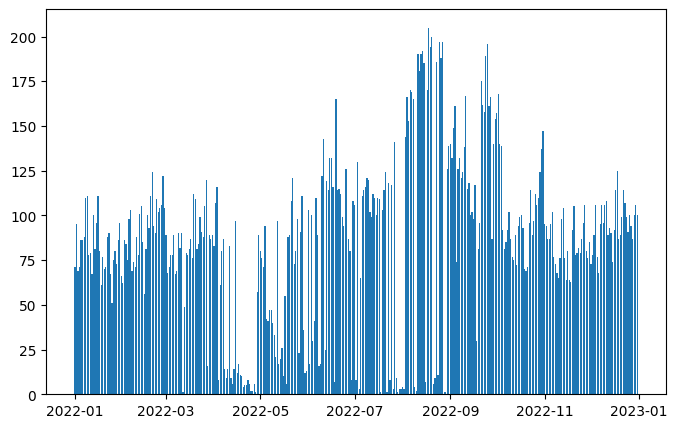

In [93]:
plt.subplots(figsize=(8,5))
plt.bar(df_by_date['date'], df_by_date['movie'])
plt.show()

In [110]:
(df_by_date['movie']<25).value_counts()

False    310
True      55
Name: movie, dtype: int64

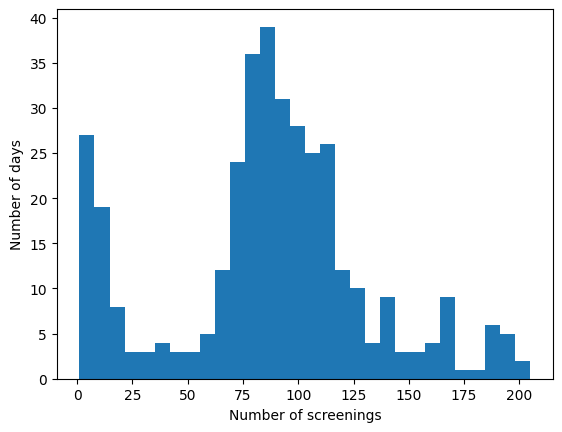

In [107]:
plt.hist(df_by_date['movie'], bins=30)
plt.xlabel("Number of screenings")
plt.ylabel("Number of days")
plt.show()